# Module 2: Appreciating, Interpreting and Visualizing Data
## Lab 2: Principal Components Analysis (PCA)


---

This lab is designed to give you an understanding of Principal Components
Analysis (PCA). PCA has been called one of the most valuable results from applied linear algebra. PCA is used abundantly in all forms of analysis - from neuroscience to computer graphics - because it is a simple, non-parametric method of extracting relevant information from confusing data sets.

Principal Component Analysis (PCA) is a linear dimensionality reduction technique that can be utilized for extracting information from a high-dimensional space by projecting it into a lower-dimensional sub-space. It tries to preserve the essential parts that have more variation of the data and remove the non-essential parts with fewer variation.

PCA is generally used for 2 applications:
1.   Visualization of high dimentional datasets.
2.   Reducing number of features, thereby speeding up ML algorithms.

**What is PCA and Why Do We Need It?**

Imagine you have a dataset with 100 features (columns).
Visualizing or analyzing this is like trying to read a book with 100 pages open at once—it’s overwhelming!
PCA helps by “summarizing” the most important information into fewer pages (features), making it easier to understand and work with.

**Real-world Analogy:**

Think of PCA like a movie review. Instead of reading all the reviews (each with many words), you just read the “summary” (the first few principal components) to get the main idea.

**Why Use PCA?**

- Visualization: Humans can’t visualize more than 3 dimensions. PCA lets us “project” high-dimensional data into 2D or 3D plots.
- Speed: Fewer features mean faster training for machine learning models.
Noise Reduction: PCA can help remove less important variations (noise) in the data.


We will be primarily focussing on the first application in this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer

In this lab, we will be using the breast_cancer dataset. The data has 569 samples with thirty features, and each sample has a label associated with it (benign or malignant).

In [2]:
breast_data = load_breast_cancer().data
print("Features:", breast_data.shape)  ### 569 rows and 30 columns expected

breast_labels = np.reshape(load_breast_cancer().target, (569,1))
print("Target:", breast_labels.shape) ### 569 rows and 1 target column expected

Features: (569, 30)
Target: (569, 1)


**About the Breast Cancer Dataset**

- Features: 30 measurements (like radius, texture, perimeter, etc.) of cell nuclei from breast mass images.
- Labels: Benign (0) or Malignant (1).
- Goal: Use PCA to reduce the 30 features to 2 or 3, so we can visualize and see if benign and malignant tumors separate naturally.

**Example:**
If you had to describe a person’s face, you might use features like eye color, nose shape, etc. PCA would find the most important features that vary the most (e.g., face shape) and ignore less important ones (e.g., freckle count).

In [7]:
## Creating a Pandas dataframe for the dataset with the last column as the target variable

final_breast_data = np.concatenate([breast_data, breast_labels],axis=1)
breast_dataset = pd.DataFrame(final_breast_data)

features = load_breast_cancer().feature_names
features_labels = np.append(features,'label')
breast_dataset.columns = features_labels
breast_dataset.tail()
#breast_dataset.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1.0


In [9]:
# Dividing the values into the features and labels for convenience later on

X = breast_dataset.iloc[:,:15].values
y = breast_dataset.iloc[:,30].values

print(np.shape(X), np.shape(y))

(569, 15) (569,)


### Step By Step Computation Of PCA
The below steps need to be followed to perform dimensionality reduction using PCA:

1. Standardization of the data

2. Computing the covariance matrix

3. Calculating the eigenvectors and eigenvalues

4. Computing the Principal Components

5. Reducing the dimensions of the data set


### 1. Standardization of the data

---
It is a common practice to normalize your data before feeding it to any machine learning algorithm.

To apply normalization, you will import StandardScaler module from the sklearn library and then apply scaling by doing fit_transform on the feature data. While applying StandardScaler, each feature of your data should be normally distributed such that it will scale the distribution to a mean of zero and a standard deviation of one.


In [11]:
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

print(np.std(X_std))

print(np.std(X_std, axis=0))  # std per feature
print(np.mean(X_std, axis=0))  # mean per feature

1.0
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[-3.16286735e-15 -6.53060890e-15 -7.07889127e-16 -8.79983452e-16
  6.13217737e-15 -1.12036918e-15 -4.42138027e-16  9.73249991e-16
 -1.97167024e-15 -1.45363120e-15 -9.07641468e-16 -8.85349205e-16
  1.77367396e-15 -8.29155139e-16 -7.54180940e-16]


**Why Standardize the Data?**


PCA is sensitive to the scale of features. If one feature is in meters and another in millimeters, PCA will be biased toward the larger scale.
Standardization (mean=0, std=1) puts all features on the same scale, so PCA treats them equally.

**Example:**
Imagine comparing heights (in cm) and weights (in kg). If you don’t scale, PCA might think height is more important just because the numbers are bigger.

Here's the data after scaling. Yes, we do loose the numerical meaning of the data, but that's okay. We are more interested in the relative positions of the data points with respect to each other.

In [17]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = features[:15]
X_std_df.head()
#X_std_df.tail()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error
0,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,2.255747,2.489734,-0.565265,2.833031,2.487578,-0.214002
1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,-0.868652,0.499255,-0.876244,0.263327,0.742402,-0.605351
2,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,-0.398008,1.228676,-0.780083,0.850928,1.181336,-0.297005
3,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,4.910919,0.326373,-0.110409,0.286593,-0.288378,0.689702
4,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,-0.562450,1.270543,-0.790244,1.273189,1.190357,1.483067


### 2. Computing the covariance matrix

---

Recall that covariance is always measured between 2 dimensions. If we have a data set with more than 2 dimensions, there is more than one covariance measurement that can be calculated. For example, from a 3 dimensional data set (dimensions x,y,z) you could calculate cov(x,y), cov(y,z) and cov(x,z). In fact, for an n-dimensional data set, you can calculate N combinatorial 2 different covariances.

Here we have 30 different features, so we will have to compute 435 different covariances.

In [20]:
mean_vec = np.mean(X_std, axis=0) ## Computing feature wise means

# Covariance matrix = i/(N-1) * X^T * X
# where X is the normalized feature matrix and N is the number of data points (rows)

cov_mat = 1/ (X_std.shape[0]-1) * (X_std - mean_vec).T.dot(X_std - mean_vec)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


In [21]:
cov_mat.shape

(15, 15)

**What Does the Covariance Matrix Tell Us?**

**What is Covariance?**

Covariance measures how much two features change together.
- Positive covariance: As one increases, the other tends to increase.
- Negative covariance: As one increases, the other tends to decrease.

**Example:**
In a dataset of ice cream sales and temperature, you’d expect positive covariance—hotter days, more ice cream sold!

**Why Compute Covariance?**

The covariance matrix shows how all features relate to each other.
PCA uses this to find directions (principal components) where the data varies the most.

A perhaps simpler way to do this is by using the numpy's covariance module "np.cov". However note that it takes as input the feature matrix with features in different rows, so in our application, we would be taking a transpose of the feature matrix before applying np.cov().

In [22]:
cov_mat_numpy = np.cov(X_std.T)

print("Covariance matrix first 5 rows and columns:")
print(cov_mat_numpy[0:5, 0:5])

Covariance matrix first 5 rows and columns:
[[ 1.00176056  0.32435193  0.99961207  0.98909547  0.17088151]
 [ 0.32435193  1.00176056  0.33011322  0.32165099 -0.02342969]
 [ 0.99961207  0.33011322  1.00176056  0.98824361  0.20764309]
 [ 0.98909547  0.32165099  0.98824361  1.00176056  0.17734005]
 [ 0.17088151 -0.02342969  0.20764309  0.17734005  1.00176056]]


### 3. Calculating the eigenvectors and eigenvalues

---

Since the covariance matrix is square, we can calculate the eigenvectors and eigenvalues for this matrix. These are rather important, as they tell us useful information about our data.

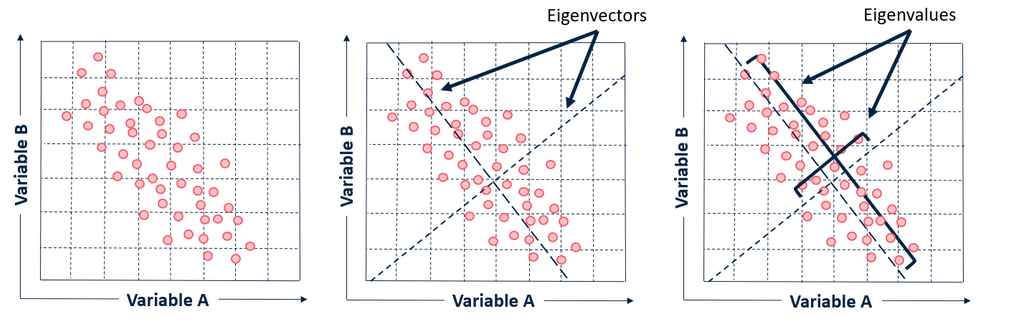

See how one of the eigenvectors goes through the middle of the points, like drawing a line of best fit? That eigenvector is showing us how these two data sets are related along that line. The second eigenvector gives us the other, less important, pattern in the data, that all the points follow the main line, but are off to the side of the main line by some amount.

So, by this process of taking the eigenvectors of the covariance matrix, we have
been able to extract lines that characterise the data.

In [23]:
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

In [24]:
eig_vals.shape, eig_vecs.shape

((15,), (15, 15))

**What Are Eigenvectors?**

- Think of them as “directions” in the data where the most variation occurs.
- The first eigenvector is the direction of maximum spread.
- The eigenvalue tells us how much variation is in that direction.

**Example:**
If you have a cloud of points shaped like a football, the first eigenvector points along the length of the football, and the eigenvalue tells you how “stretched out” it is.

### 4. Computing the Principal Components

---




Explained variance:
[np.float64(49.421332848800745), np.float64(19.188102643031833), np.float64(10.598741468361457), np.float64(6.833075266109012), np.float64(3.878841576960907), np.float64(3.11628709086988), np.float64(2.6318988243267722), np.float64(2.30638559248479), np.float64(0.7999938924074307), np.float64(0.5241350760838595), np.float64(0.3188726909024817), np.float64(0.19891944992663277), np.float64(0.14381080670067284), np.float64(0.03822565425488472), np.float64(0.0013771187786467333)]
Cumulative explained variance:
[ 49.42133285  68.60943549  79.20817696  86.04125223  89.9200938
  93.03638089  95.66827972  97.97466531  98.7746592   99.29879428
  99.61766697  99.81658642  99.96039723  99.99862288 100.        ]


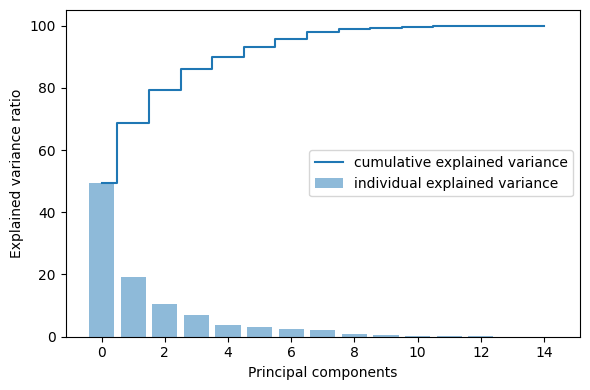

In [26]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key=lambda x: x[0], reverse=True)

tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]
print("Explained variance:")
print(var_exp)

cum_var_exp = np.cumsum(var_exp)
print("Cumulative explained variance:")
print(cum_var_exp)

# Plotting the variance explained by each component and the cumulative variance explained

plt.figure(figsize=(6 , 4))
plt.bar(range(len(var_exp)), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(len(var_exp)), cum_var_exp, where='mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

**What Does “Explained Variance” Mean?**

- It tells us how much of the total variation in the data is captured by each principal component.
- The first PC captures the most variation, the second PC captures the next most, and so on.

**Example:**
If PC1 explains 44% and PC2 explains 19%, together they explain 63% of the data’s variation. The rest is less important or noise.
Rule of Thumb:

Keep enough PCs to explain 80-95% of the variance.

In this lab, the first 2 PCs explain ~65%, and the first 3 explain ~75%.

So, the first principal component alone explains more than 40% variance in the dataset. Also note that considering all the 30 dimensions explains 100% of the variance in the dataset as expected.

Choosing a suitable number of components for further visualizations is generally based on the cumulative sum of PCs. The first 2 PCs explain nearly 65% variance, and the first 3 explain close to 75% variance.

Lets now try and reduce the dimensions of our dataset to the first 2 and 3 principal components

### 5. Reducing the dimensions of the data set

---



In [28]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(15,1),
                      eig_pairs[1][1].reshape(15,1),
                      eig_pairs[2][1].reshape(15,1)))

Y = X_std.dot(matrix_w)

print(Y)

[[ 6.64552116 -2.68096254 -1.95441924]
 [ 2.00769255  2.65787368 -0.80451408]
 [ 4.33342259  0.53888989 -1.07918645]
 ...
 [ 0.82392383  1.89336646  0.74756488]
 [ 6.84995117 -1.77515958 -0.59298627]
 [-3.46662013  1.07043125  2.31533208]]


**Dimensionality Reduction**

**How to Choose the Number of Components?**

- Look at the cumulative explained variance plot.
- Choose the point where adding more PCs doesn’t add much new information (the “elbow”).

**Example:**
If the first 5 PCs explain 90% of the variance, you can reduce 30 features to 5 with minimal information loss!

Now, that you have spent such a long time building this final matrix Y which has reduced each datapoint to 3 dimensions......

All of this can also be done in 2 lines by using sklearn's PCA module.

In [29]:
from sklearn.decomposition import PCA

sklearn_pca = PCA(n_components=3)
Y_sklearn = sklearn_pca.fit_transform(X_std)

print(Y_sklearn)

[[ 6.64552116  2.68096254 -1.95441924]
 [ 2.00769255 -2.65787368 -0.80451408]
 [ 4.33342259 -0.53888989 -1.07918645]
 ...
 [ 0.82392383 -1.89336646  0.74756488]
 [ 6.84995117  1.77515958 -0.59298627]
 [-3.46662013 -1.07043125  2.31533208]]


## Let's visualize our dataset in 2 and 3 dimensions now

---



In [30]:
final_df = pd.DataFrame(columns=["PC1", "PC2", "PC3", "Label"])

for i in range(len(Y)):

    dicti = dict()

    dicti["PC1"] = Y[i, 0]
    dicti["PC2"] = Y[i, 1]
    dicti["PC3"] = Y[i, 2]
    if (int(breast_labels[i][0]) == 0):
      dicti["Label"] = "Benign"
    else:
      dicti["Label"] = "Malignant"

    final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


final_df.head()

/tmp/ipython-input-36910974.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  final_df = pd.concat([final_df, pd.DataFrame([dicti])], ignore_index=True)


,PC1,PC2,PC3,Label
0,6.645521,-2.680963,-1.954419,Benign
1,2.007693,2.657874,-0.804514,Benign
2,4.333423,0.538890,-1.079186,Benign
3,2.762859,-6.898981,-2.046340,Benign
4,3.883360,0.838835,-0.477149,Benign


**Interpreting the 2D Plot:**

- Each point is a tumor, colored by label (benign/malignant).
- If the two groups separate well, PCA has found a useful pattern!

**Why Is This Useful for Machine Learning?**

If the classes separate in 2D/3D, a simple model (like a line or plane) can classify them easily.

This means you can train a model on fewer features, reducing overfitting and speeding up training.




In [31]:
import plotly.graph_objects as go
import plotly.express as px

In [32]:
for_x = final_df.PC1.tolist()
for_y = final_df.PC2.tolist()
for_label = final_df.Label.tolist()
for_hover = final_df.Label.tolist()

fig = px.scatter(x=for_x, y=for_y, color=for_label,
                 title="Principal Component Axis",
                 color_discrete_map={"Benign": "aqua", "Malignant": "yellow"})

fig.update_layout(
    xaxis=dict(title = 'PC1', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    yaxis=dict(title = 'PC2', showgrid=True, ticks='inside', zeroline=True, mirror=True, showline=True, linecolor='white'),
    plot_bgcolor='#555555',
    font=dict(
        family="Times New Roman",
        size=16,
        color="Black"))
fig.update_traces(marker=dict(size=8,))

fig.show(renderer = "colab")

### Question:
Referring to the plot above, can you reason why PCA can be a good candidate before training models for Machine learning?

#### Answer:
You can see that the first 2 principal components were able to differentiate the benign and malignant tumours in our breast cancer dataset. This motivates the use of the second application of PCA, which was to reduce the number of features in the dataset so that the machine learning algorithm can be trained without overfitting.



Let us now try and visualize this in the first 3 Principal Components space.

In [34]:
fig = px.scatter_3d(final_df, x='PC1', y='PC2', z='PC3', color='Label', title="Principal Component Axis")
fig.update_traces(marker=dict(size=5,))

fig.show(renderer = "colab")

Feel free to explore this interactive plot by PLOTLY, which is also another great tool for visualizations. You can zoom, pan, rotate, turn and download this plot.

**PCA in the Real World**

**Use Case: Image Compression**

- Images have many pixels (high dimensions).
- PCA can reduce the number of features while keeping most of the visual information.
- Example: Netflix uses PCA-like techniques to compress thumbnails, saving bandwidth.

**How It Works:**

- Each image is a high-dimensional vector.
- PCA finds the most important “patterns” (e.g., edges, colors).
- Only these patterns are stored, reducing file size.

Exersise
1. How many components do you need to retain 90% of the variance in the data?
2. Find one other use case that makes use of PCA and summarize how it is applied to the problem domain.

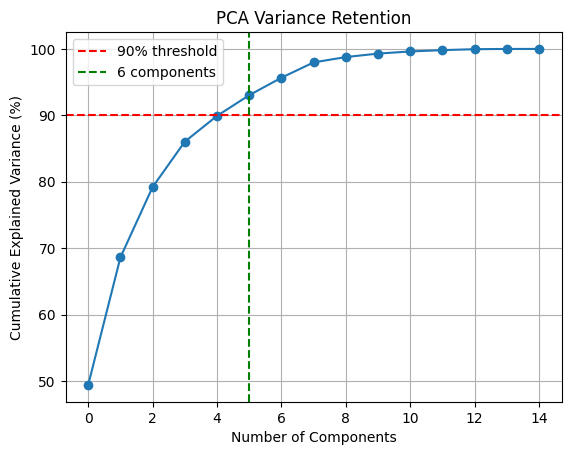

In [37]:
import matplotlib.pyplot as plt

# Find the number of components to retain 90% variance
n_components_90 = np.argmax(cum_var_exp >= 90) + 1

plt.plot(cum_var_exp, marker='o')
plt.axhline(y=90, color='r', linestyle='--', label='90% threshold')
plt.axvline(x=n_components_90 - 1, color='g', linestyle='--', label=f'{n_components_90} components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.title('PCA Variance Retention')
plt.legend()
plt.grid(True)
plt.show()

6 components are enough to retain 90% of the variance in the data as per the above graph


### Summary Table: Principal Component Analysis (PCA)

| Step                | What It Does                                                                 | Example/Analogy                          |
|---------------------|-----------------------------------------------------------------------------|------------------------------------------|
| Standardization     | Puts all features on the same scale (mean=0, std=1)                         | Comparing apples and oranges             |
| Covariance Matrix   | Shows how features relate to each other (positive/negative covariance)     | Ice cream sales vs. temperature          |
| Eigenvectors        | Directions of maximum variation in the data                                 | Length of a football                     |
| Eigenvalues         | Magnitude of variation in the direction of each eigenvector                | How "stretched" the football is          |
| Explained Variance  | Percentage of total data variation captured by each principal component    | Movie review summary                     |
| Dimensionality Red. | Reduces features while keeping most information                             | Compressing a photo                      |
| Visualization       | Projects high-dimensional data into 2D/3D for easy interpretation           | Plotting tumors as benign/malignant      |
| Noise Reduction     | Removes less important variations (noise)                                   | Ignoring background noise in a recording |
| Speed Up ML         | Fewer features mean faster model training and less overfitting              | Reading a summary instead of a full book |


### Some interesting references:

1. https://builtin.com/data-science/step-step-explanation-principal-component-analysis

2. http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

3. https://www.cs.cmu.edu/~elaw/papers/pca.pdf

4. https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60